In [1]:
import requests
import pandas as pd
import matplotlib as plt


In [2]:
url_events = "https://eonet.gsfc.nasa.gov/api/v3/events"
url_categorias = "https://eonet.gsfc.nasa.gov/api/v3/categories"
url_layers = "https://eonet.gsfc.nasa.gov/api/v3/layers"
url_source = "https://eonet.gsfc.nasa.gov/api/v3/sources"


In [3]:
response_events = requests.get(url_events)


In [4]:
response_categorias = requests.get(url_categorias)

In [5]:
response_layers = requests.get(url_layers)

In [6]:
response_source = requests.get(url_source)


In [7]:
#captura a informação dos json
data_events = response_events.json()
data_categorias = response_categorias.json()
data_layers = response_layers.json()
data_source = response_source.json()


events = data_events['events']
categorias = data_categorias['categories']
layers = data_layers['categories']
source = data_source['sources']



df_events = pd.json_normalize(events)
df_categorias = pd.json_normalize(categorias)
df_layers = pd.json_normalize(data_layers['categories'], 'layers')
df_source = pd.json_normalize(source)
    
    

In [38]:
df_events.head(3)

,id,title,description,link,closed,categories,sources,geometry
0,EONET_11744,Tropical Cyclone Dana,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'JTWC', 'url': 'https://www.metoc.navy...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt..."
1,EONET_11729,Hurricane Kristy,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'JTWC', 'url': 'https://www.metoc.navy...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt..."
2,EONET_11728,Tropical Storm Trami,None,https://eonet.gsfc.nasa.gov/api/v3/events/EONE...,None,"[{'id': 'severeStorms', 'title': 'Severe Storm...","[{'id': 'JTWC', 'url': 'https://www.metoc.navy...","[{'magnitudeValue': 35.0, 'magnitudeUnit': 'kt..."


In [9]:
df_events.categories.shape

(3683,)

In [39]:
titulos = df_events['categories'].apply(lambda x: [d['id'] for d in x])
# titulos.head(50)


In [40]:
df_exploded = titulos.explode('titulos')
# df_exploded.head()
titulos_unicos = df_exploded.unique()
print(titulos_unicos)

['severeStorms' 'wildfires' 'volcanoes' 'seaLakeIce']


In [41]:
titulos

0       [severeStorms]
1       [severeStorms]
2       [severeStorms]
3          [wildfires]
4          [wildfires]
             ...      
3678      [seaLakeIce]
3679      [seaLakeIce]
3680      [seaLakeIce]
3681      [seaLakeIce]
3682       [volcanoes]
Name: categories, Length: 3683, dtype: object

In [42]:
contagem = titulos.value_counts(normalize= True)
print(contagem)

categories
[wildfires]       0.977464
[seaLakeIce]      0.012218
[volcanoes]       0.008960
[severeStorms]    0.001358
Name: proportion, dtype: float64


<Axes: xlabel='categories', ylabel='quantidade'>

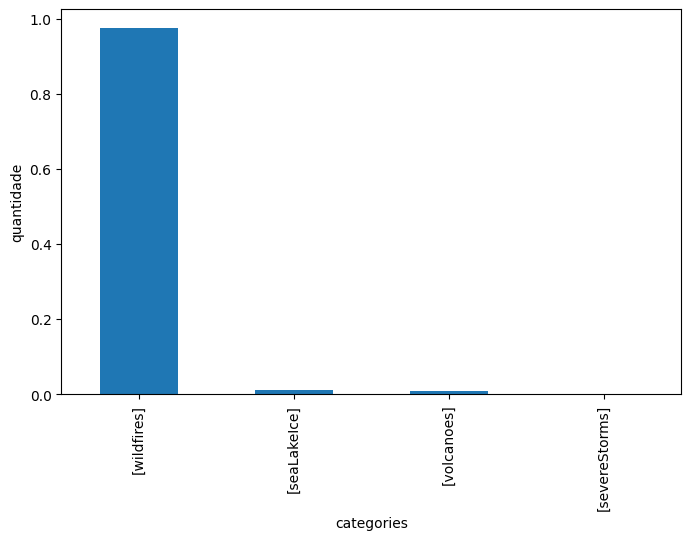

In [45]:
contagem.plot(kind = 'bar', xlabel= 'categories', ylabel='quantidade',  figsize= (8,5))

In [51]:
df_categorias.head(13)

,id,title,link,description,layers
0,drought,Drought,https://eonet.gsfc.nasa.gov/api/v3/categories/...,Long lasting absence of precipitation affectin...,https://eonet.gsfc.nasa.gov/api/v3/layers/drought
1,dustHaze,Dust and Haze,https://eonet.gsfc.nasa.gov/api/v3/categories/...,"Related to dust storms, air pollution and othe...",https://eonet.gsfc.nasa.gov/api/v3/layers/dust...
2,earthquakes,Earthquakes,https://eonet.gsfc.nasa.gov/api/v3/categories/...,Related to all manner of shaking and displacem...,https://eonet.gsfc.nasa.gov/api/v3/layers/eart...
3,floods,Floods,https://eonet.gsfc.nasa.gov/api/v3/categories/...,"Related to aspects of actual flooding--e.g., i...",https://eonet.gsfc.nasa.gov/api/v3/layers/floods
4,landslides,Landslides,https://eonet.gsfc.nasa.gov/api/v3/categories/...,Related to landslides and variations thereof: ...,https://eonet.gsfc.nasa.gov/api/v3/layers/land...
5,manmade,Manmade,https://eonet.gsfc.nasa.gov/api/v3/categories/...,Events that have been human-induced and are ex...,https://eonet.gsfc.nasa.gov/api/v3/layers/manmade
6,seaLakeIce,Sea and Lake Ice,https://eonet.gsfc.nasa.gov/api/v3/categories/...,Related to all ice that resides on oceans and ...,https://eonet.gsfc.nasa.gov/api/v3/layers/seaL...
7,severeStorms,Severe Storms,https://eonet.gsfc.nasa.gov/api/v3/categories/...,Related to the atmospheric aspect of storms (h...,https://eonet.gsfc.nasa.gov/api/v3/layers/seve...
8,snow,Snow,https://eonet.gsfc.nasa.gov/api/v3/categories/...,"Related to snow events, particularly extreme/a...",https://eonet.gsfc.nasa.gov/api/v3/layers/snow
9,tempExtremes,Temperature Extremes,https://eonet.gsfc.nasa.gov/api/v3/categories/...,"Related to anomalous land temperatures, either...",https://eonet.gsfc.nasa.gov/api/v3/layers/temp...


In [65]:
selecao = df_categorias.query('title == "Wildfires" | title =="Volcanoes" | title == "Severe Storms" | title == "Sea and Lake Ice"')
for i in range(4):
    print(selecao['title'].iloc[i])
    print(selecao['description'].iloc[i])

Sea and Lake Ice
Related to all ice that resides on oceans and lakes, including sea and lake ice (permanent and seasonal) and icebergs.
Severe Storms
Related to the atmospheric aspect of storms (hurricanes, cyclones, tornadoes, etc.). Results of storms may be included under floods, landslides, etc.
Volcanoes
Related to both the physical effects of an eruption (rock, ash, lava) and the atmospheric (ash and gas plumes).
Wildfires includes all nature of fire, including forest and plains fires, as well as urban and industrial fire events. Fires may be naturally caused or manmade.


In [13]:
df_categorias.shape

(13, 5)

In [14]:
df_layers.head(3)

,name,serviceUrl,serviceTypeId,parameters
0,AIRS_CO_Total_Column_Day,https://gibs.earthdata.nasa.gov/wmts/epsg4326/...,WMTS_1_0_0,"[{'TILEMATRIXSET': '2km', 'FORMAT': 'image/png'}]"
1,AIRS_CO_Total_Column_Day,https://gibs.earthdata.nasa.gov/wmts/epsg4326/...,WMTS_1_0_0,"[{'TILEMATRIXSET': '2km', 'FORMAT': 'image/png'}]"
2,AIRS_CO_Total_Column_Day,https://gibs.earthdata.nasa.gov/wmts/epsg4326/...,WMTS_1_0_0,"[{'TILEMATRIXSET': '2km', 'FORMAT': 'image/png'}]"


In [15]:
df_layers.shape

(201, 4)

In [16]:
df_source.head(3)

,id,title,source,link
0,AVO,Alaska Volcano Observatory,https://www.avo.alaska.edu/,https://eonet.gsfc.nasa.gov/api/v3/events?sour...
1,ABFIRE,Alberta Wildfire,https://wildfire.alberta.ca/,https://eonet.gsfc.nasa.gov/api/v3/events?sour...
2,AU_BOM,Australia Bureau of Meteorology,http://www.bom.gov.au/,https://eonet.gsfc.nasa.gov/api/v3/events?sour...


In [17]:
df_source.shape

(33, 4)